In [22]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam,SGD,Adagrad
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.initializers import glorot_uniform

from tqdm.auto import tqdm
tqdm.pandas()

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/silero-stress-predictor/sample_submission.csv
/kaggle/input/silero-stress-predictor/train.csv
/kaggle/input/silero-stress-predictor/test.csv


## Preprocessing

In [6]:
df = pd.read_csv('/kaggle/input/silero-stress-predictor/train.csv')
# test_df = pd.read_csv('/kaggle/input/silero-stress-predictor/test.csv')

In [7]:
print(f'df base accuarcies:') 
for i in range(1, 7):
    print(f"{len(df[df['stress'] == i])/df.shape[0]: .4} for {i}-class")

df base accuarcies:
 0.2404 for 1-class
 0.3937 for 2-class
 0.2912 for 3-class
 0.06589 for 4-class
 0.008433 for 5-class
 0.0003783 for 6-class


In [8]:
alphabet = {char: i for i, char in enumerate('абвгдеёжзийклмнопрстуфхцчшщъыьэюя')}
vowels = set('аеёиоуыэюя')

def set_bin_value(string: str, char: str, num: int) -> int:
    result = 0
    if num < len(string):
        if string[num] == char:
            result += 1
            if char in vowels:
                result += 1
    return result

In [9]:
for name in ['word', 'lemma']:
    max_len = max(map(len, df[name].values))
    print(f'{name}:', end='')
    for i in range(max_len):
        for j, char in enumerate(alphabet):
            df[f'bin_{name}_{i}_{j}char'] = df[f'{name}'].apply(lambda x: set_bin_value(string=x,char=char,num=i))
        print(f'{i+1: >2}/{max_len}', end=' ')
    print()

word: 1/20  2/20  3/20  4/20  5/20  6/20  7/20  8/20  9/20 10/20 11/20 12/20 13/20 14/20 15/20 16/20 17/20 18/20 19/20 20/20 
lemma: 1/20  2/20  3/20  4/20  5/20  6/20  7/20  8/20  9/20 10/20 11/20 12/20 13/20 14/20 15/20 16/20 17/20 18/20 19/20 20/20 


In [10]:
df['stress'] = df['stress'].apply(lambda x: x - 1)

In [11]:
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
# sc = StandardScaler()

# X = sc.fit_transform(df.drop(columns = ['id', 'stress', 'word', 'lemma']))
X = df.drop(columns = ['id', 'stress', 'word', 'lemma'])
y = df['stress'].values

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Model Building

In [13]:
def getModel(dropout=0.00, neurons_first=500, neurons_second=250, learningRate=0.1):
    model = Sequential()
    model.add(Dense(neurons_first, activation='relu', input_dim=X_train.shape[1], 
                    kernel_initializer=glorot_uniform(),
                    name='Dense_first'))
    model.add(Dropout(dropout, name='Dropout_first'))
    model.add(Dense(neurons_second, activation='relu', kernel_initializer=glorot_uniform(),
                    name='Dense_second'))
    model.add(Dropout(dropout, name='Dropout_second'))
    model.add(Dense(6, activation='softmax',
                    kernel_initializer=glorot_uniform(),
                    name='Result'))
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=Adagrad(lr=learningRate), metrics=['accuracy'])
    return model

In [18]:

        print(name)
        model=getModel(neurons_first = neurons)
        modelTrain = model.fit(X_train, y_train, validation_split=0.2, epochs=10)
        history[name] = modelTrain.history

500neurons_AUTObatch
Epoch 1/10
1269/1269 [==============================] - 7s 5ms/step - loss: 0.8008 - accuracy: 0.6544 - val_loss: 0.6526 - val_accuracy: 0.7331
Epoch 2/10
1269/1269 [==============================] - 7s 5ms/step - loss: 0.5431 - accuracy: 0.7809 - val_loss: 0.5666 - val_accuracy: 0.7803
Epoch 3/10
1269/1269 [==============================] - 7s 5ms/step - loss: 0.3985 - accuracy: 0.8439 - val_loss: 0.4937 - val_accuracy: 0.8088
Epoch 4/10
1269/1269 [==============================] - 7s 5ms/step - loss: 0.2922 - accuracy: 0.8863 - val_loss: 0.4534 - val_accuracy: 0.8395
Epoch 5/10
1269/1269 [==============================] - 7s 6ms/step - loss: 0.2180 - accuracy: 0.9174 - val_loss: 0.4567 - val_accuracy: 0.8459
Epoch 6/10
1269/1269 [==============================] - 7s 5ms/step - loss: 0.1604 - accuracy: 0.9385 - val_loss: 0.4937 - val_accuracy: 0.8430
Epoch 7/10
1269/1269 [==============================] - 7s 5ms/step - loss: 0.1188 - accuracy: 0.9560 - val_loss: 0

In [87]:
import pickle

# with open('history.pkl', 'wb') as f:
#     pickle.dump(history, f)

with open('history.pkl', 'rb') as f:
    history = pickle.load(f)

In [30]:
neurons = [500, 1500]
batches = [16, 32, 64, 128, 256, 512]

	loss


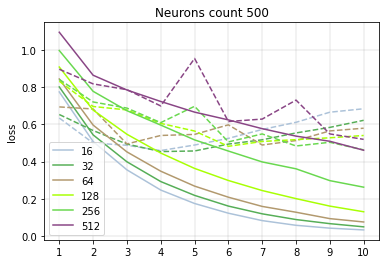

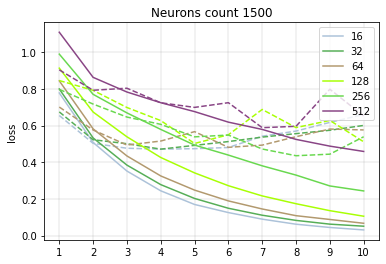

	accuracy


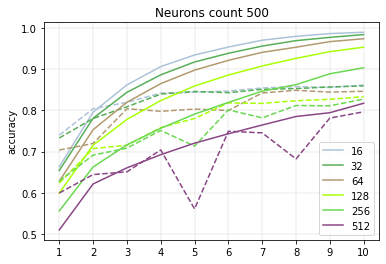

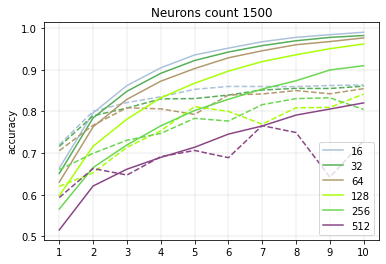

In [76]:
import matplotlib.pyplot as plt

epochs = [i+1 for i in range(10)]
colors_list = list(colors._colors_full_map.values())

print('\tloss')
for neurons in [500, 1500]:
    for batch, c in zip([16, 32, 64, 128, 256, 512], colors_list):
        item = history[f'{neurons}neurons_{batch}batch']
        plt.grid(True, color='#090909', linewidth=0.1)
        plt.plot(epochs, item['val_loss'], '--', color=c)
        plt.plot(epochs, item['loss'], color=c, label=f'{batch}')
        
        plt.title(f'Neurons count {neurons}')
        plt.ylabel('loss')
        plt.xticks(epochs)
    plt.legend()
    plt.show()
    
print('\taccuracy')
for neurons in [500, 1500]:
    for batch, c in zip([16, 32, 64, 128, 256, 512], colors_list):
        item = history[f'{neurons}neurons_{batch}batch']
        plt.grid(True, color='0.3', linewidth=0.1)
        plt.plot(epochs, item['val_accuracy'], '--', color=c)
        plt.plot(epochs, item['accuracy'], color=c, label=f'{batch}')
        
        plt.title(f'Neurons count {neurons}')
        plt.ylabel('accuracy')
        plt.xticks(epochs)
    plt.legend()
    plt.show()

	loss


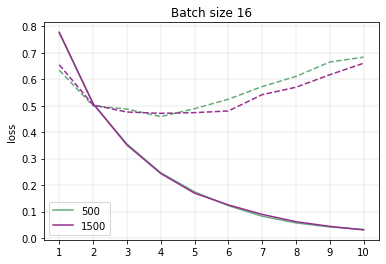

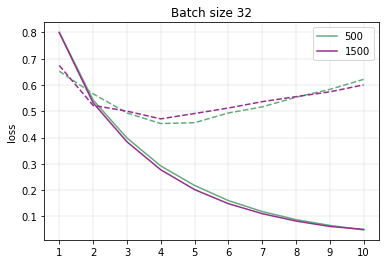

	accuracy


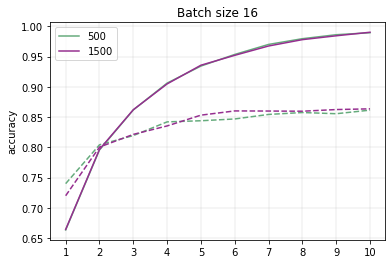

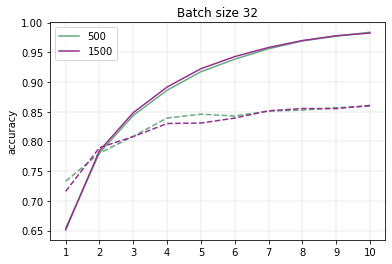

In [85]:
import matplotlib.pyplot as plt

epochs = [i+1 for i in range(10)]
colors_list = list(colors._colors_full_map.values())[8:]

print('\tloss')
for batch in [16, 32]:
    for neurons, c in zip([500, 1500], colors_list):
        item = history[f'{neurons}neurons_{batch}batch']
        plt.grid(True, color='0.3', linewidth=0.1)
        plt.plot(epochs, item['val_loss'], '--', color=c)
        plt.plot(epochs, item['loss'], color=c, label=f'{neurons}')
        
        plt.title(f'Batch size {batch}')
        plt.ylabel('loss')
        plt.xticks(epochs)
    plt.legend()
    plt.show()

print('\taccuracy')
for batch in [16, 32]:
    for neurons, c in zip([500, 1500], colors_list):
        item = history[f'{neurons}neurons_{batch}batch']
        plt.grid(True, color='0.3', linewidth=0.1)
        plt.plot(epochs, item['val_accuracy'], '--', color=c)
        plt.plot(epochs, item['accuracy'], color=c, label=f'{neurons}')
        
        plt.title(f'Batch size {batch}')
        plt.ylabel('accuracy')
        plt.xticks(epochs)
    plt.legend()
    plt.show()